# Assignment 2

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./05_src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [ ]:
import pandas as pd

file_path = "/Users/atulkalra/Desktop/DSI Assignment/production-1/05_src/forest+fires/forestfires.csv"

df = pd.read_csv(file_path)

# Display first few rows
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('/Users/atulkalra/Desktop/DSI Assignment/production-1/05_src/forest+fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Get X and Y

Create the features data frame and target data.

In [43]:
X = fires_dt.drop(columns=['area'])

# Define target variable
y = fires_dt['area']

# Display the first few rows of X and y
print(X.head())
print(y.head())

   coord_x  coord_y month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain
0        7        5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1        7        4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2        7        4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3        8        6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4        8        6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["month", "day"]
numerical_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']

preproc1 = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

print(preproc1)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['month', 'day'])])


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ["month", "day"]
numerical_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']

non_linear_features = ['dc', 'isi']

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('transform', PowerTransformer(method='yeo-johnson')) 
])


preproc2 = ColumnTransformer([
    ('num', StandardScaler(), [col for col in numerical_features if col not in non_linear_features]),  # Scaled only
    ('num_transformed', num_pipeline, non_linear_features),  # Scaled + Transformed
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encoding for categorical features
])

print(preproc2)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'temp',
                                  'rh', 'wind', 'rain']),
                                ('num_transformed',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer())]),
                                 ['dc', 'isi']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['month', 'day'])])


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [8]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# Pipeline A = preproc1 + baseline

baseline_model = Ridge()

advanced_model = RandomForestRegressor(random_state=42)

# Pipeline A: preproc1 + Baseline (Ridge)
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', baseline_model)
])

In [12]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', baseline_model)
])

In [13]:
# Pipeline C = preproc1 + advanced model
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', advanced_model)
])

In [14]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', advanced_model)
])  

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [24]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Ridge Regression Hyperparameter Grid (Baseline Models)
ridge_params = {
    'regressor__alpha': [0.1, 1, 10, 100]  # Different alpha values
}

# Random Forest Hyperparameter Grid (Advanced Models)
rf_params = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees
    'regressor__max_depth': [None, 10, 20],     # Tree depth
    'regressor__min_samples_split': [2, 5, 10]  # Minimum samples per split
}

In [29]:
# Function to perform GridSearch and evaluate models
def tune_and_evaluate(pipeline, param_grid, X, y, model_name):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X, y)
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best MAE for {model_name}: {-grid_search.best_score_}\n")
    
    return grid_search.best_estimator_

In [30]:
# Tune Ridge Regression (Baseline Models)
best_pipeline_A = tune_and_evaluate(pipeline_A, ridge_params, X, y, "Pipeline A (Preproc1 + Ridge)")
best_pipeline_B = tune_and_evaluate(pipeline_B, ridge_params, X, y, "Pipeline B (Preproc2 + Ridge)")

# Tune Random Forest (Advanced Models)
best_pipeline_C = tune_and_evaluate(pipeline_C, rf_params, X, y, "Pipeline C (Preproc1 + Random Forest)")
best_pipeline_D = tune_and_evaluate(pipeline_D, rf_params, X, y, "Pipeline D (Preproc2 + Random Forest)")

Best Parameters for Pipeline A (Preproc1 + Ridge): {'regressor__alpha': 100}
Best MAE for Pipeline A (Preproc1 + Ridge): 20.79899196659478

Best Parameters for Pipeline B (Preproc2 + Ridge): {'regressor__alpha': 100}
Best MAE for Pipeline B (Preproc2 + Ridge): 20.729008614072473

Best Parameters for Pipeline C (Preproc1 + Random Forest): {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best MAE for Pipeline C (Preproc1 + Random Forest): 23.331982174056957

Best Parameters for Pipeline D (Preproc2 + Random Forest): {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best MAE for Pipeline D (Preproc2 + Random Forest): 23.26426301743562



# Evaluate

+ Which model has the best performance?

In [35]:
pipelines = [
    (best_pipeline_A, "Pipeline A"),
    (best_pipeline_B, "Pipeline B"),
    (best_pipeline_C, "Pipeline C"),
    (best_pipeline_D, "Pipeline D"),
]

In [37]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.metrics import mean_absolute_error

# Dictionary to store performance results
performance_results = {}

for model, name in pipelines:
    y_pred = model.predict(X_test)  # Now X_test is defined
    mae = mean_absolute_error(y_test, y_pred)
    performance_results[name] = mae

# Identify the best model based on lowest MAE
best_model_name = min(performance_results, key=performance_results.get)
print(f"Best Performing Model: {best_model_name} with MAE = {performance_results[best_model_name]}")

Best Performing Model: Pipeline C with MAE = 14.880252289933837


# Export

+ Save the best performing model to a pickle file.

In [ ]:
import pickle

best_model = None
for model, name in pipelines:
    if name == best_model_name:
        best_model = model
        break

# Export the best performing model to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"The best model has been saved to 'best_model.pkl'")

The best model has been saved to 'best_model.pkl'


In [ ]:
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded_model for predictions
y_pred = loaded_model.predict(X_test)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [41]:
import pickle

# Load the best-performing model
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

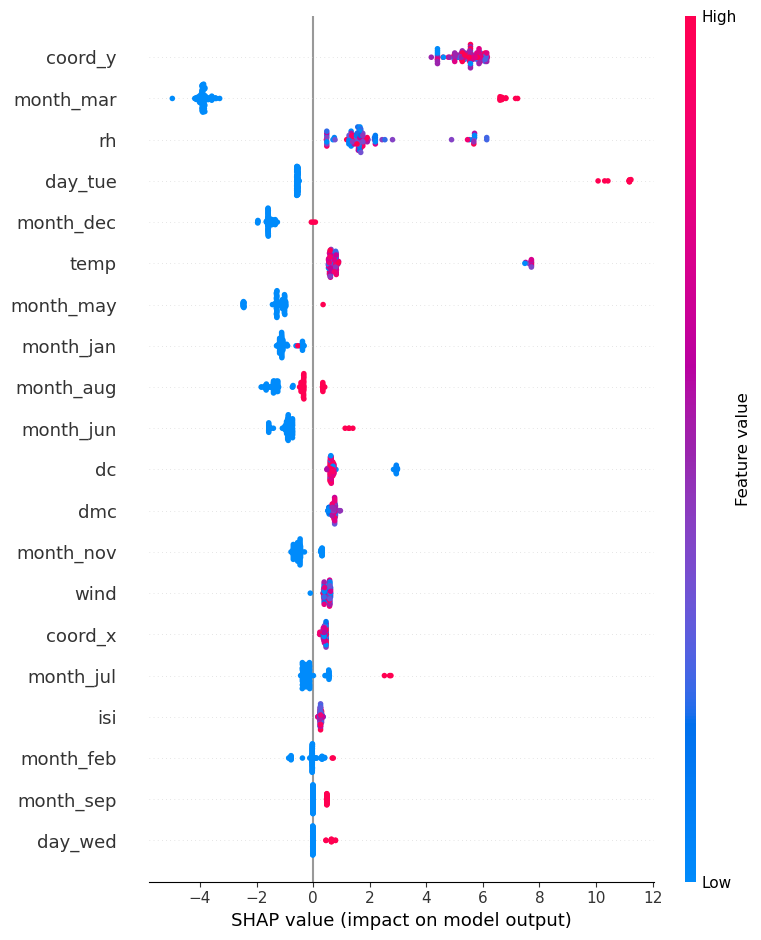

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap

# Define categorical columns (assuming 'month' and 'day' are categorical)
categorical_cols = ['month', 'day']

# Define one-hot encoder (updated parameter name)
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap

# Define column transformer to apply the encoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Fit the preprocessor on the training data (X_train)
preprocessor.fit(X_train)

# Apply one-hot encoding to the test data (X_test)
X_test_encoded = preprocessor.transform(X_test)

# Now, apply the SHAP explainer on the encoded test set
explainer = shap.TreeExplainer(best_model.named_steps['regressor'])

# Get SHAP values for the test set with additivity check disabled
shap_values = explainer.shap_values(X_test_encoded, check_additivity=False)

# Get feature names from the fitted OneHotEncoder (using preprocessor)
# The preprocessor.transformers_[0][1] is the OneHotEncoder object
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)

# If there are any additional non-categorical columns in the dataset, make sure to append them
# Assuming non-categorical columns follow after the encoded features:
non_cat_cols = [col for col in X_train.columns if col not in categorical_cols]

# Combine categorical and non-categorical feature names
feature_names_combined = list(feature_names) + non_cat_cols

# Now you can proceed with SHAP plots as before
shap.summary_plot(shap_values, X_test_encoded, feature_names=feature_names_combined)

The SHAP analysis reveals that the most important features influencing the model's predictions are coord_y, rh (relative humidity), and temp (temperature), as they exhibit high SHAP values and significantly impact the output. On the other hand, the least important features include day_wed, some monthly indicators such as month_sep, month_feb, and month_jul, and coord_x, all of which show minimal SHAP impact and contribute little to the model’s predictions. Given this, we can consider removing day_wed, day_tue, and the low-impact monthly indicators since they do not add meaningful value. 

## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at the `help` channel. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.